<center><h1>Assignment 2</h1></center>

## Problem Statement
Implementing Feedforward neural networks with Keras and TensorFlow
1. Import the necessary packages
2. Load the training and testing data (MNIST/CIFAR10)
3. Define the network architecture using Keras
4. Train the model using SGD
5. Evaluate the network
6. Plot the training loss and accuracy

## Notebook Details
1. Author : Varad Girish Mashalkar
2. Branch : Information Technology
3. Division : BE 11
4. Batch : Q11
5. Roll Number : 43335
6. Course : Laboratory Practice 4 (Deep Learning)

## Implementation Details
1. Python version : 3.7.0
2. Tensorflow version : 2.7.0 (Compatible with CUDA11.5 and cuDNN8.6.0)

## Imports
1. numpy
2. tensorflow
3. matplotlib
4. seaborn
5. LabelBinarizer and classification_report from sklearn.preprocessing and sklearn.metrics respectively

## MNIST dataset
1. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
2. Popularly used for training and testing in machine learning
3. Consists of 60000 training images, 10000 testing images
4. Each image has a dimension of 28 X 28 pixels with no depth (gray scale images)

# 1. Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
sns.set()
%matplotlib inline

In [2]:
# Checking import version of tensorflow
tf.__version__

'2.7.0'

# 2. Fetching the dataset

In [3]:
dataset = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [4]:
(x_train, y_train), (x_test, y_test) = dataset

In [5]:
print("Training data inputs shape  : ", x_train.shape)
print("Training data targets shape : ", y_train.shape)
print("Testing data inputs shape   : ", x_test.shape)
print("Testing data targets shape  : ", y_test.shape)

Training data inputs shape  :  (60000, 28, 28)
Training data targets shape :  (60000,)
Testing data inputs shape   :  (10000, 28, 28)
Testing data targets shape  :  (10000,)


# 3. Data analysis

### a) Checking maximum and minimum values in dataset

In [6]:
max_val = max([np.max(x_train), np.max(x_test)])
min_val = max([np.min(x_train), np.min(x_test)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  255
Minimum value :  0


### b) Class count in training and testing sets

In [7]:
train_unique_targets, train_targets_frequency = np.unique(y_train, return_counts=True)
test_unique_targets, test_targets_frequency = np.unique(y_test, return_counts=True)

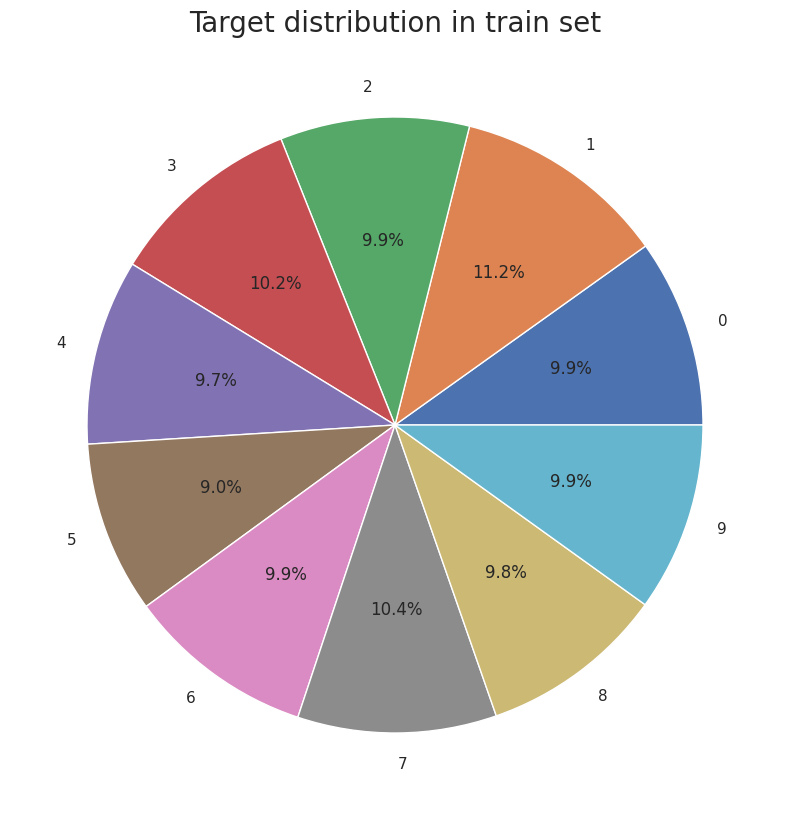

In [8]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=train_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in train set", fontsize=20)
plt.show()

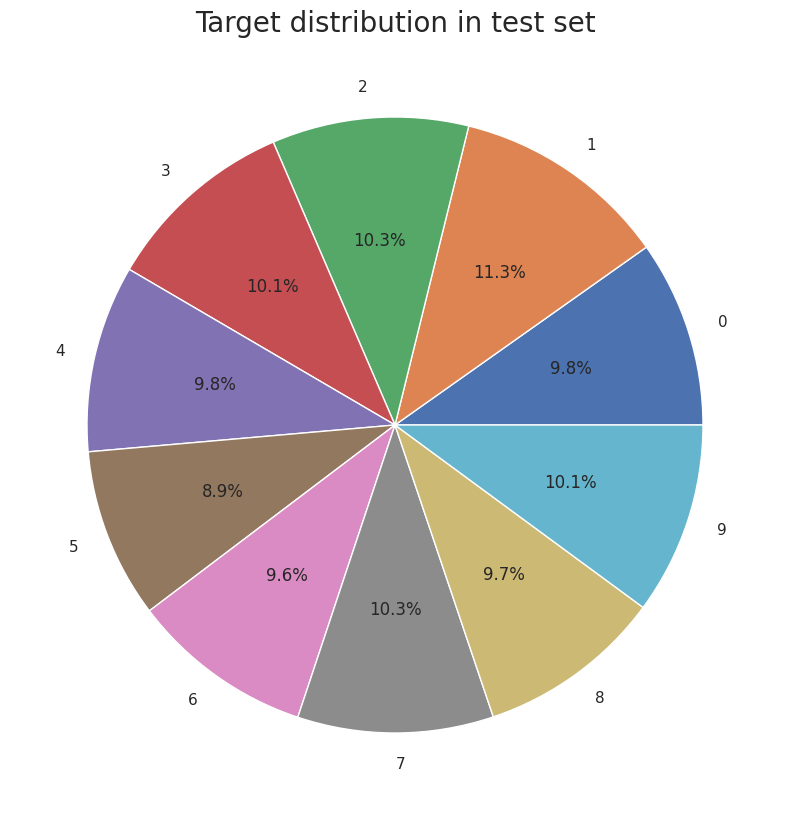

In [9]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=test_targets_frequency,
    labels=train_unique_targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in test set", fontsize=20)
plt.show()

# Observations :

1. Maximum pixel value : 255
2. Minimum pixel value : 0
3. Number of target classes : 10 [0-9]
4. Approximate frequency of classes in training and testing targets : ~10%
5. The dataset is balanced for the number of samples for each class in training and testing dataset
6. Dataset needs to be scaled for better convergence of SGD

# 4. Viewing random data points in dataset 

In [10]:
idx = 1000

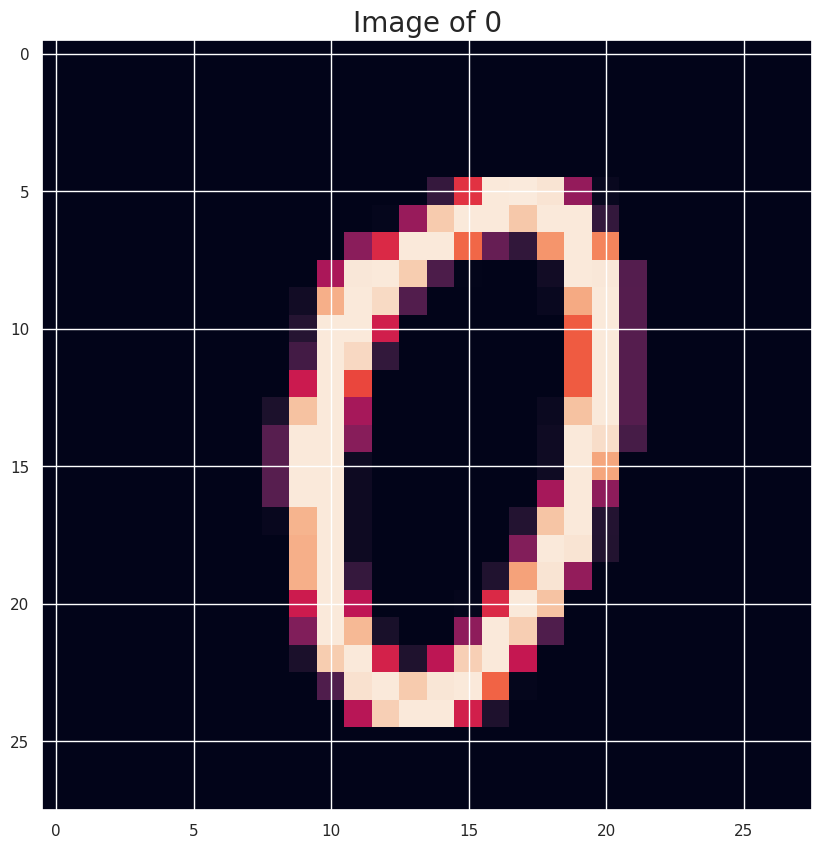

In [11]:
frame = np.float64(x_train[idx])
target = y_train[idx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(frame)
plt.title("Image of {}".format(target), fontsize=20)
plt.show()

# 5. Data preprocessing

## a) Feature scaling

In [12]:
# Scaling train and test inputs for a range of 0 to 1 by dividing by 255 (scalar)
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [13]:
# Confirming maximum and minimum value in dataset
max_val = max([np.max(x_train_scaled), np.max(x_test_scaled)])
min_val = max([np.min(x_train_scaled), np.min(x_test_scaled)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  1.0
Minimum value :  0.0


## b) Image flattening

In [14]:
def flatten_image_array(image_array):
    data_points = image_array.shape[0]
    flattened_image_array = []
    for data_point in image_array:
        flattened_image = data_point.flatten()
        flattened_image_array.append(flattened_image)
    return np.vstack(flattened_image_array)

In [15]:
x_train_scaled_flattened = flatten_image_array(x_train_scaled)
x_test_scaled_flattened = flatten_image_array(x_test_scaled)

In [16]:
x_train_scaled_flattened.shape

(60000, 784)

In [17]:
x_test_scaled_flattened.shape

(10000, 784)

## c) Label binarization

In [18]:
# Defining the binarization object
lb = LabelBinarizer()

In [19]:
lb.fit(y_train)

LabelBinarizer()

In [20]:
lb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
# Binarizing the training and testing labels
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

In [22]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
y_train_binarized[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
y_test_binarized[:5]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

# 6. Model Definition

In [26]:
# Defining constants
EPOCHS = 10
BATCH_SIZE = 64

In [27]:
# Defining model Structure
model = tf.keras.models.Sequential([
    tfl.Dense(units=300, activation='relu', input_shape=(784,)),
    tfl.Dense(units=300, activation='relu'),
    tfl.Dense(units=10, activation='softmax')
])

2022-10-17 15:15:49.160032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:15:49.195760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:15:49.195972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 15:15:49.197020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [31]:
# Compiling model 
model.compile(
    optimizer='sgd',                          # Stochastic Gradient Descent Optimizer
    metrics=['accuracy'],                     # Track accuracy while training
    loss='categorical_crossentropy'    # Defining loss function
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


# 7. Model Training

In [33]:
history = model.fit(
    x=x_train_scaled_flattened, 
    y=y_train_binarized,   
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8278 - accuracy: 0.8029
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.9008
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.9156
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.9248
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2392 - accuracy: 0.9320
Epoch 6/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2197 - accuracy: 0.9376
Epoch 7/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9423
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1888 - accuracy: 0.9466
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1762 - accuracy: 0.9498
Epoch 10/10
938/938 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9525

# 8. Model testing

In [36]:
results = model.evaluate(x_test_scaled_flattened, y_test_binarized, batch_size=BATCH_SIZE)

157/157 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9531


In [37]:
test_loss, test_accuracy = results

In [38]:
print("Testing accuracy : ", test_accuracy*100, "%")

Testing accuracy :  95.31000256538391 %


# 9. Plotting training loss and accuracy over epochs

In [39]:
len(history.history['loss'])

10

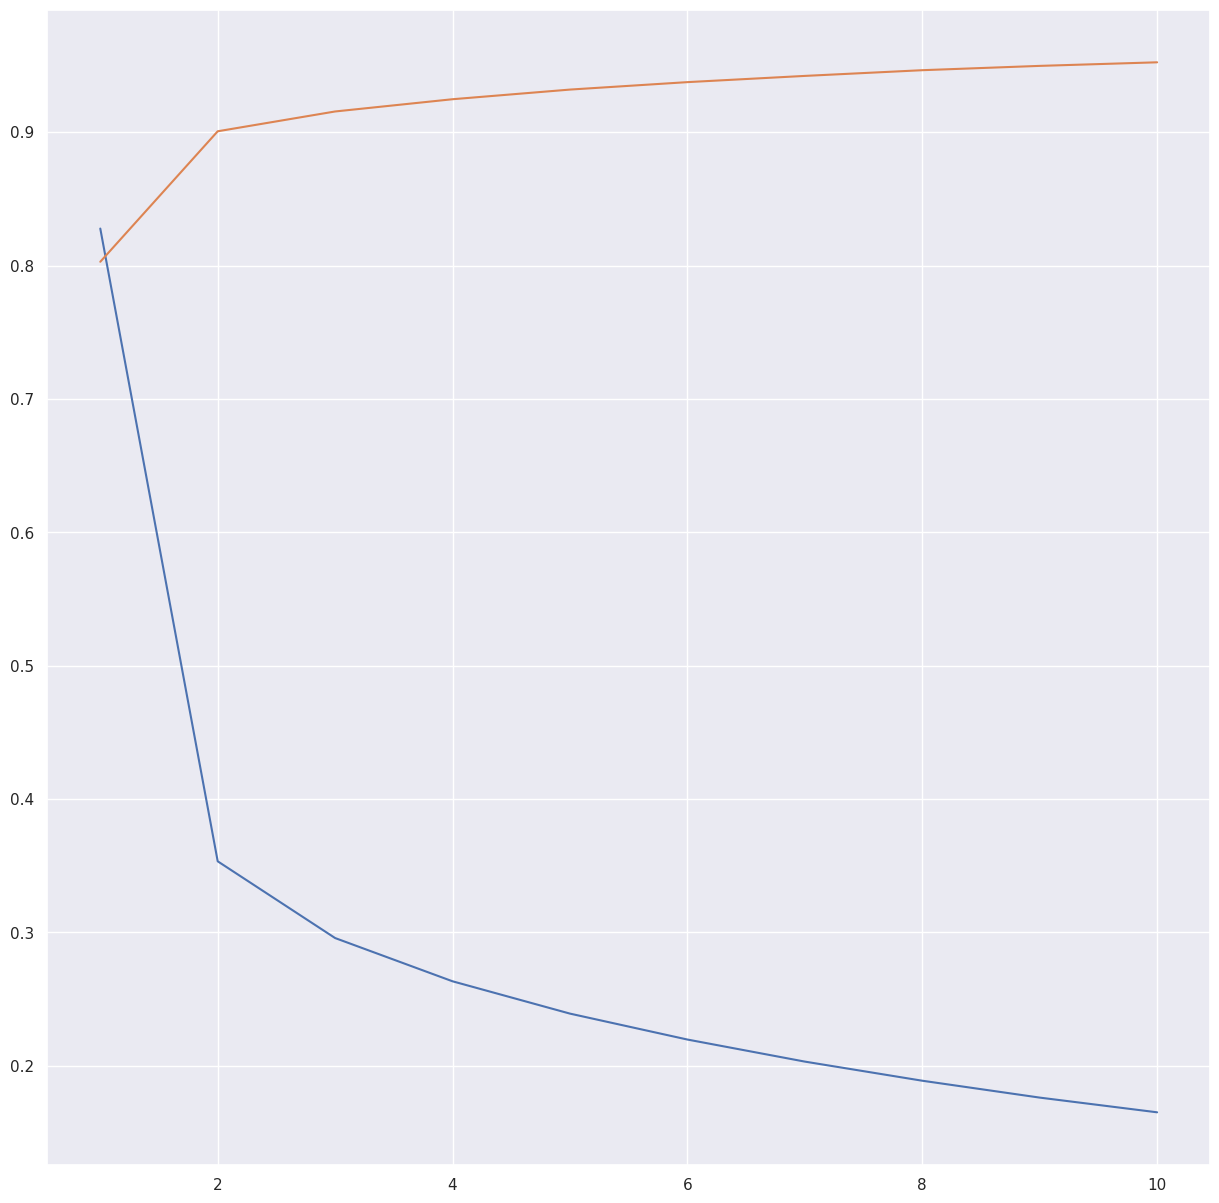

In [40]:
epochs = np.arange(1, 11)
training_loss = history.history["loss"]
training_accuracy = history.history["accuracy"]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.plot(epochs, training_loss,)
ax.plot(epochs, training_accuracy)
plt.show()

# 10. Results

1. Training data final accuracy : 95.25%
2. Testing accuracy : 95.31%

In [47]:
# Observing result on test set
test_idx = 3014

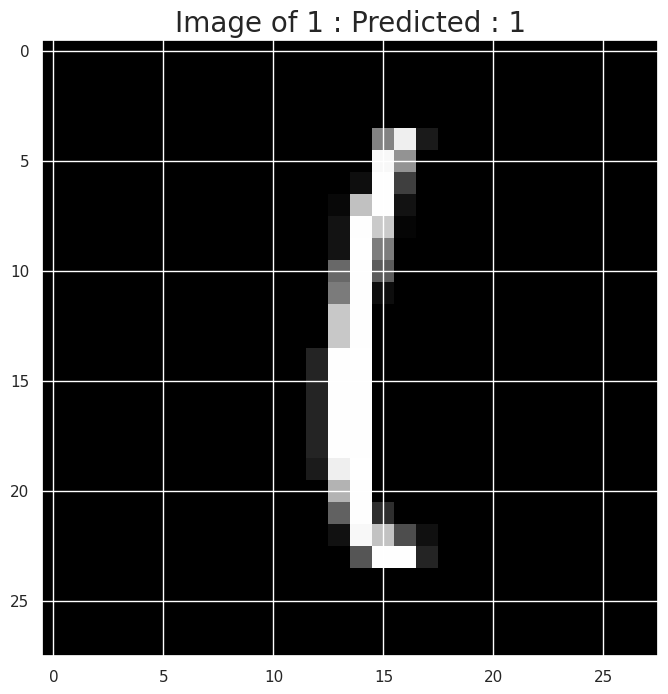

In [48]:
frame = x_test_scaled_flattened[test_idx].reshape(-1, 784)
target = y_test[test_idx]
prediction = np.argmax(model.predict(frame))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.imshow(x_test[test_idx], cmap="gray")
plt.title("Image of {} : Predicted : {}".format(target, prediction), fontsize=20)
plt.show()

# 11. Classification report

In [49]:
predictions = model.predict(x_test_scaled_flattened)

In [50]:
predictions_decoded = [np.argmax(i) for i in predictions]

In [51]:
report = classification_report(y_test, predictions_decoded)

In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.95      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



<center><h1>End of Notebook</h1></center>